 # Topic 6: Dimensionality reduction
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        :  Dimensionality reduction \\

   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----

# PCA: Eigen descomposition



In this practice your team will receive 2410 images grouped into 38 classes, where each class represents images of the face of the same person.

- Remember the Egen decomposition: $M V= \lambda V$
- For this example: $faces*Eigenfaces = \lambda Eigenfaces$
- faces: It is a matrix where each row represents an image.
- EigenFaces: They are the eigenvectors that are obtained after the egendecomposition.

Below you are provided with the Load_data code that allows you to read the images from the file. This function returns the images in matrix form and their labels for subsequent classification tasks.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import seaborn as sns



#from google.colab import drive
#drive.mount('/content/drive/')
path = './'



def Load_data(file):
  faces_m_format = scipy.io.loadmat(path + file)
  faces = faces_m_format['faces']
  m = int(faces_m_format['m'])
  n = int(faces_m_format['n'])
  nfaces = np.ndarray.flatten(faces_m_format['nfaces'])

  y = np.zeros((faces.shape[1],))
  j = 0
  classes = list(range(len(nfaces)))
  for i in nfaces:
    y[j:j+i] = classes.pop(0)
    j = j + i

  print("Total dataset size:")
  print(f"n_samples: {faces.shape[1]}")
  print(f"n_features: {m*n}")
  print(f"n_classes: {len(nfaces)}")
  return faces, y

X,Y = Load_data('allFaces.mat')



Total dataset size:
n_samples: 2410
n_features: 32256
n_classes: 38


C:\Users\vilch\AppData\Local\Temp\ipykernel_380272\888707780.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(faces_m_format['m'])
C:\Users\vilch\AppData\Local\Temp\ipykernel_380272\888707780.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(faces_m_format['n'])


# Viewing the images
The Plot_Face function is used to plot the images. Remember that each image is a vector, so internally it is transformed into a
matrix of the correct dimensions of the image to be displayed. Here is an example when viewing image 4

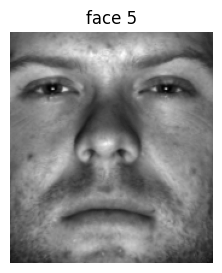

In [5]:
def Plot_Face(image_vec, i,title):
  m = 168
  n = 192
  fig1 = plt.figure(figsize=(10, 3))
  image = np.reshape(image_vec, (m, n))
  img = plt.imshow(image.T)
  img.set_cmap('gray')
  plt.title(title  + str(i+1))
  plt.axis('off')
  plt.show()

# Example of use
number_image = 4
image_vec = X.T[number_image]
Plot_Face(image_vec,number_image,'face ')

# PCA dimensional Reduction
Use Principal Component Analysis to obtain the K eigen vectors with the highest variance. You can use  [PCA - Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [15]:
#Write your code here for PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X.T)
print(X_pca.shape)

(2410, 40)


# Analyzing the components
Project the original data to the k most relevant components. Use fit_tranform to get the transformed data.
- Print or show the applied variance ratio and decide on the most relevant K eigenvectors
- Plot the k components using the Plot_Face function. Remember that the function will internally transform the vector into a matrix.
- The images you can see are called eigenfaces in this case.
- This tells us that any face can be reconstructed with a linear combination of these eigenfaces. <font color='red'> !!!Great right?</font> 😊😊

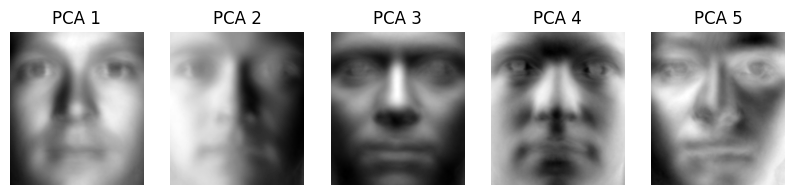

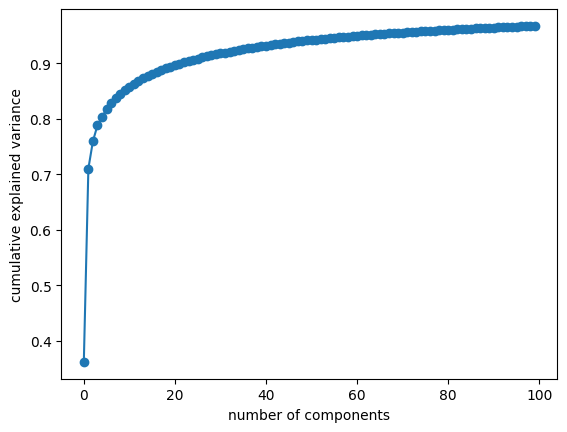

[3.62125410e-01 3.48439067e-01 4.93326001e-02 2.85230850e-02
 1.49509075e-02 1.41758915e-02 1.07499913e-02 9.42206164e-03
 7.40165357e-03 6.72931186e-03 6.38897728e-03 5.20502252e-03
 4.99037265e-03 4.46058771e-03 4.03701379e-03 3.91440992e-03
 3.45489839e-03 3.39479375e-03 3.14230205e-03 3.11136420e-03
 2.85401084e-03 2.60133559e-03 2.43667142e-03 2.41039755e-03
 2.22839933e-03 2.09107506e-03 2.05184188e-03 1.96221762e-03
 1.87647772e-03 1.75769822e-03 1.67647116e-03 1.62875755e-03
 1.56928586e-03 1.53350640e-03 1.44867413e-03 1.43718296e-03
 1.40202507e-03 1.38698570e-03 1.29907209e-03 1.24148731e-03
 1.22982947e-03 1.16753820e-03 1.10584813e-03 1.06613575e-03
 1.05648030e-03 1.02143755e-03 9.70120609e-04 9.44235945e-04
 9.06024280e-04 8.90201380e-04 8.67091740e-04 8.53532411e-04
 8.27274612e-04 7.93994307e-04 7.89005503e-04 7.77936474e-04
 7.34607638e-04 7.01153139e-04 6.85314644e-04 6.83418550e-04
 6.69246023e-04 6.57484904e-04 6.49610555e-04 6.33918884e-04
 6.18394798e-04 6.010008

In [7]:
#Write your code here
def Plot_PCA(X_pca,Y, n_components):
  fig = plt.figure(figsize=(10, 3))
  for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    plt.imshow(np.reshape(pca.components_[i], (168, 192)).T, cmap='gray')
    plt.axis('off')
    plt.title(f"PCA {i+1}")
  plt.show()

Plot_PCA(X_pca,Y, 5)

#Grafico de caracteristicas vs informacion
plt.plot(np.cumsum(pca.explained_variance_ratio_), "-o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#print variance
print(pca.explained_variance_ratio_)
print(X_pca)

# Clustering.

**Congratulations**, your team has managed to transform the face matrix from an Nxd matrix to an Nxk matrix, where k << d. You have managed to reduce the dimensionality. Very good... 😊😊



Now, with this new data and with the same Y labels, the data can be randomly divided 80% for training and 30% for testing. You can use  [this library]( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data.

You can now train a classification model. Use the sklear  [SVM](https://scikit-learn.org/stable/modules/svm.html)  to train and test the results. Your team should show a confusion matrix for the result.  

## <font color='red'> !!!The hunger games has begun. Good luck. right? </font>  😱 😱 😱





In [16]:
# write your code here

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#use 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

#Train the model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

#Predict the test data
y_pred = clf.predict(X_test)

#print accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9073305670816044
